# Exercise 3
## Task 1

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

import pandas as pd

In [5]:
df = pd.read_csv('CP.csv')
df

,AT,V,AP,RH,PE,TCN
0,12.126o34286589265,52.813061,952.873086,95.05569,LOW,Simo Sikka
1,8.44,41.170000,1019.900000,70.72000,486.15,Marc Wolf
2,16.73,54.300000,1017.960000,59.44000,460.54,Christopher Clapman
3,24.91,71.290000,1008.290000,69.06000,437.03,Antoin Tessier
4,32.45,66.440000,1011.210000,50.18000,429.99,Antoin Tessier
...,...,...,...,...,...,...
10519,13.857337913o19988,42.661501,1110.707139,71.13719,LOW,Simo Sikka
10520,22.81,71.850000,1009.610000,75.17000,440.4,Marc Wolf
10521,17.o4,56.030000,1020.380000,68.69000,462.48,Marc Wolf
10522,19.o8,46.930000,1010.600000,75.21000,454.45,Antoin Tessier


### Variables
Hourly average ambient variables Temperature (AT)- Float <br>
Exhaust Vacuum (V)- Float <br>
Ambient Pressure (AP) - Float <br>
Relative Humidity (RH) - Float <br>
Net hourly electrical energy output (PE) - Float <br>
Technician (TCN) - String <br>

C:\Users\lucas\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\lucas\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


RuntimeError: The data contains non-finite values.

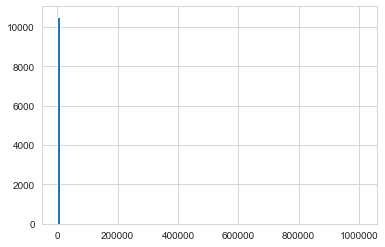

In [6]:
plt.hist(df['AP'], bins=100)

from scipy.stats import norm

mean, std = norm.fit(df['AP'])

In [ ]:
plt.hist(df['RH'])

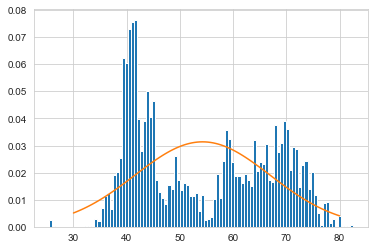

In [7]:
plt.hist(df['V'],bins=100, density = True)

from scipy.stats import norm

mean, std = norm.fit(df['V'])

import numpy as np
x = np.linspace(30,80,100)
y = norm.pdf(x, mean, std)

plt.plot(x,y)

As we can see, a Gaussian is not appropriate for our distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000193640B4E48>,
      dtype=object)

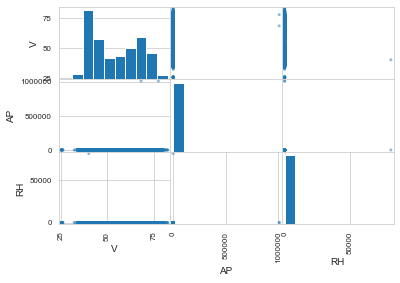

In [8]:
pd.plotting.scatter_matrix(df)

## Task 2

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9501 entries, 1 to 10523
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9501 non-null   float64
 1   V       9501 non-null   float64
 2   AP      9501 non-null   float64
 3   RH      9501 non-null   float64
 4   PE      9501 non-null   object 
 5   TCN     9501 non-null   object 
dtypes: float64(4), object(2)
memory usage: 519.6+ KB


In [23]:
df = df[df.AP < 100000.00]
df = df[df.RH <= 100]
df.describe()

,AT,V,AP,RH
count,9501.000000,9501.000000,9501.000000,9501.000000
mean,31.253275,54.343103,1013.072421,73.147500
std,22.433336,12.722495,21.562838,14.502286
min,1.810000,25.360000,-1007.220000,25.560000
25%,15.290000,41.700000,1009.130000,63.230000
50%,24.050000,52.360000,1012.970000,74.840000
75%,33.170000,66.540000,1017.290000,84.650000
max,95.180000,81.560000,1033.300000,100.000000


In [10]:
df = df.dropna()
df.count()

AT     10514
V      10514
AP     10514
RH     10514
PE     10514
TCN    10514
dtype: int64

In [11]:
df = df[df.PE != 'LOW']

In [12]:
df.AT

1         8.44
2        16.73
3        24.91
4        32.45
5        17.45
         ...  
10518     19.o
10520    22.81
10521    17.o4
10522    19.o8
10523     7.94
Name: AT, Length: 9559, dtype: object

In [13]:
df['AT'] = df['AT'].str.replace('o','0')

In [16]:
df['AT'] = df['AT'].astype(float)

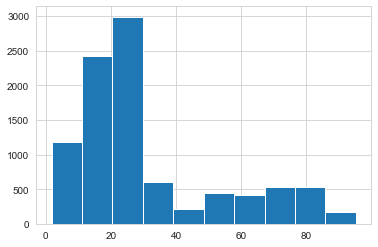

In [25]:
df['AT'].hist()

In [32]:
df['PE'] = df['PE'].astype(float)
df = df[df.PE < 1000]
df = df[df.PE > 0]

In [33]:
df.describe()

,AT,V,AP,RH,PE
count,9498.000000,9498.000000,9498.000000,9498.000000,9498.000000
mean,31.248312,54.344934,1013.071505,73.146096,454.349744
std,22.430940,12.723144,21.566038,14.504150,17.107311
min,1.810000,25.360000,-1007.220000,25.560000,420.260000
25%,15.290000,41.710000,1009.130000,63.230000,439.710000
50%,24.050000,52.360000,1012.970000,74.845000,451.480000
75%,33.150000,66.540000,1017.287500,84.657500,468.485000
max,95.180000,81.560000,1033.300000,100.000000,495.760000


## Task 3

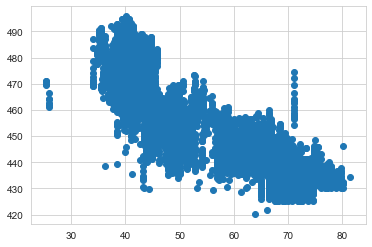

In [34]:
plt.scatter(df.V, df.PE)

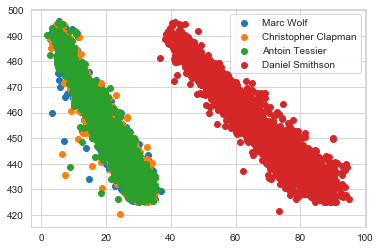

In [46]:
datasets = dict()

for name in df.TCN.unique(): # gives all unique values in TCN columns
    datasets[name] = df[df['TCN'] == name]
    plt.scatter(datasets[name].AT, datasets[name].PE, label=name)

plt.legend()

### 
#Maybe the values of Daniel Smithson are in another unit.
#Therefore, we must convert it. 
#By the x-axis, we can see that probably 'Red points'(Daniel Smithson) are in Fahrenheit degrees, while the rest is in Celcius.
###

In [47]:
# Converting F to C in "Daniel Smithson" rows

def corrector(row):
    if row['TCN'] == 'Daniel Smithson':
        return (row['AT']-32)*5/9
    else:
        return row['AT']
    
df.AT = df.apply(corrector, axis = 1)
        

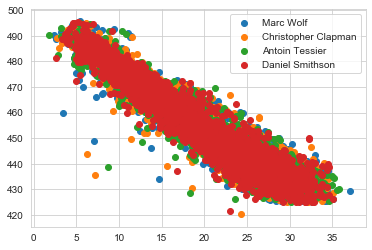

In [48]:
for name in df.TCN.unique(): # gives all unique values in TCN columns
    datasets[name] = df[df['TCN'] == name]
    plt.scatter(datasets[name].AT, datasets[name].PE, label=name)

plt.legend()


## Task 4

In [53]:
# we must encode the names of the technicians
df['TCN'].unique()

array(['Marc Wolf', 'Christopher Clapman', 'Antoin Tessier',
       'Daniel Smithson'], dtype=object)

In [54]:
pseudonyms = dict()

i = 0
for name in df.TCN.unique():
    pseudonyms[name] = i
    i += 1

In [55]:
pseudonyms 

{'Marc Wolf': 0,
 'Christopher Clapman': 1,
 'Antoin Tessier': 2,
 'Daniel Smithson': 3}

In [56]:
df.TCN = df.TCN.apply(lambda x: pseudonyms[x])

In [57]:
df

,AT,V,AP,RH,PE,TCN
1,8.44,41.17,1019.90,70.72,486.15,0
2,16.73,54.30,1017.96,59.44,460.54,1
3,24.91,71.29,1008.29,69.06,437.03,2
4,32.45,66.44,1011.21,50.18,429.99,2
5,17.45,49.64,1026.40,66.67,454.67,1
...,...,...,...,...,...,...
10518,19.00,58.95,1018.05,83.38,451.96,1
10520,22.81,71.85,1009.61,75.17,440.40,0
10521,17.04,56.03,1020.38,68.69,462.48,0
10522,19.08,46.93,1010.60,75.21,454.45,2
